# Exemples des méthodes de krigeage
Exemple avec une entrée et deux sorties, un métamodèle/sortie.

Construction des métamodèles par les trois options :'multi_start, best_start, global'

In [1]:
import openturns as ot
from openturns.viewer import View
import numpy as np
from matplotlib import pyplot as plt
import pythontools as pyto

## Definition des entrées et des valeurs initiales

In [2]:
xmin = 1 # borne inférieur de la variable d'entrée x
xmax = 20 # borne supérieure de la variable d'entrée x
n_pt = 21 # nombre des points du plan d'expériences
size_multistart = 1000 # nombre de points de départ pour les options muti_start, et best_start
n_pts_plot = 1000 # nombre de points de x pour tracer les courbes
x_plot = np.vstack(np.linspace(xmin, xmax, n_pts_plot)) # les points x tracés

## Définir et tracer la fonction originale et les points du plan d'expériences (Data)

In [3]:
# Première fonction originale
ref_func1 = ot.SymbolicFunction(['x'], ['x * sin(x) '])
# Deuxième fonction originale
ref_func2 = ot.SymbolicFunction(['x'], ['x * cos(x)^2'])

x = np.vstack(np.linspace(xmin, xmax, n_pt))
X = ot.Sample(n_pt, 1)
X[:, 0] = x
y1 = np.array(ref_func1(X))
y2 = np.array(ref_func2(X))
Y = ot.Sample(n_pt, 2)
Y[:, 0] = y1
Y[:, 1] = y2

Text(0.5, 0.98, 'Original functions')

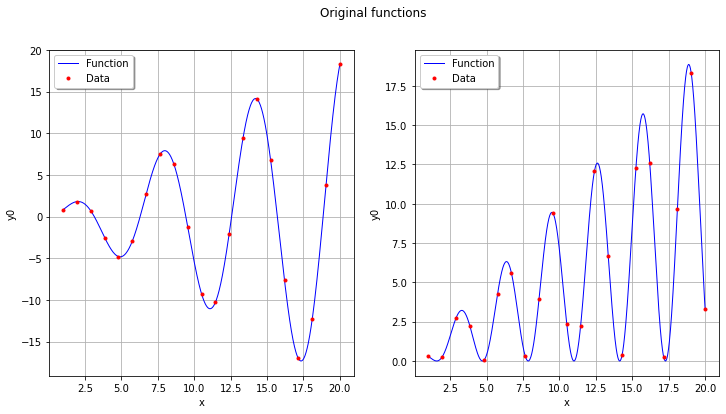

In [4]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))
graph = ref_func1.draw(xmin, xmax, n_pts_plot)
cloud = ot.Cloud(x, y1)
cloud.setColor('red')
cloud.setPointStyle('bullet')
graph.add(cloud)
graph.setLegends(["Function","Data"])
graph.setLegendPosition("topleft")
View(graph, axes=[ax1])

graph = ref_func2.draw(xmin, xmax, n_pts_plot)
cloud = ot.Cloud(x, y2)
cloud.setColor('red')
cloud.setPointStyle('bullet')
graph.add(cloud)
graph.setLegends(["Function","Data"])
graph.setLegendPosition("topleft")
View(graph, axes=[ax2])
fig.suptitle("Original functions")

## Réalise la construction des métamodèles dans les trois cas

### Définition des entrée et sorties du krigeage

In [5]:
input_sample = X
output_sample = Y

### Optimisation des paramètres de krigeage avec l'option "multi_start"
Réaliser l'optimisation avec plusieurs points de départ, le nombre des points de départ est déterminé par la variable "size_multistart"

In [6]:
# Construction d'un modèle initiale de l'algorithme de krigeage.
algo_kriging = pyto.build_default_kriging_algo(input_sample, output_sample, basis=None,
                            covariance_model=None, noise=None)

# Optimisation des paramètres de krigeage en paratant de l'algorithme initial.
kriging_algo = pyto.estimate_kriging_theta(algo_kriging, lower_bound=None, upper_bound=None, 
                                           size=size_multistart, optim_type='multi_start')

# Récupérer les métamodèles et calculer les coefficients Q2
kriging_result = []
for krig_algo in kriging_algo: 
    kriging_result.append(krig_algo.getResult())

kriging_meta = []
Q2 = []
for krig_result in kriging_result:
    kriging_meta.append(krig_result.getMetaModel())
    
    # calcul de Q2 pour les deux métamodèles
    Q2.append(pyto.compute_Q2(input_sample, output_sample, krig_result))
print('Q2:', Q2)

Q2: [0.8855350223102412, 0.8855294795678589]


Text(0.5, 0.98, 'Kriging result')

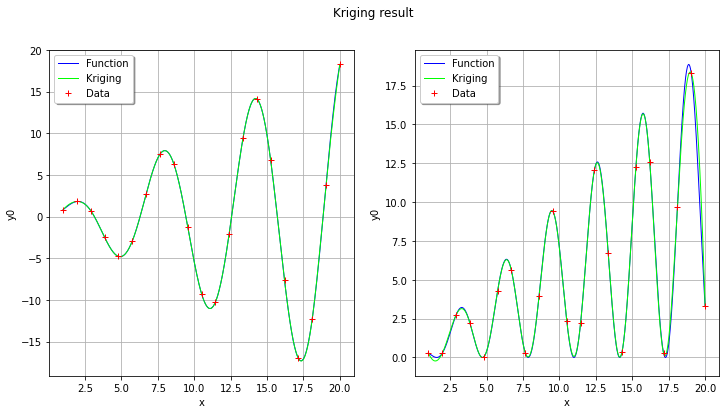

In [7]:

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))

graph = ref_func1.draw(xmin, xmax, n_pts_plot)
graph.setLegends(["Function"])
graphKriging = kriging_meta[0].draw(xmin, xmax, n_pts_plot)
graphKriging.setColors(["green"])
graphKriging.setLegends(["Kriging"])
graph.add(graphKriging)
cloud = ot.Cloud(x,y1)
cloud.setColor("red")
cloud.setLegend("Data")
graph.add(cloud)
graph.setLegendPosition("topleft")
View(graph, axes=[ax1])

graph = ref_func2.draw(xmin, xmax, n_pts_plot)
graph.setLegends(["Function"])
graphKriging = kriging_meta[1].draw(xmin, xmax, n_pts_plot)
graphKriging.setColors(["green"])
graphKriging.setLegends(["Kriging"])
graph.add(graphKriging)
cloud = ot.Cloud(x,y2)
cloud.setColor("red")
cloud.setLegend("Data")
graph.add(cloud)
graph.setLegendPosition("topleft")
View(graph, axes=[ax2])
fig.suptitle("Kriging result")

### Optimisation des paramètres de krigeage avec l'option "best_start"
Réaliser l'optimisation en partant du point qui a la plus grande valeur de la fonction de vraisemblance, parmi un nombre "size_multistart" des points de départ proposés.

In [8]:
# Construction d'un modèle initiale de l'algorithme de krigeage.
algo_kriging = pyto.build_default_kriging_algo(input_sample, output_sample, basis=None,
                            covariance_model=None, noise=None)

# Optimisation des paramètres de krigeage en paratant de l'algorithme initial.
kriging_algo = pyto.estimate_kriging_theta(algo_kriging, lower_bound=None, upper_bound=None, 
                                           size=size_multistart, optim_type='best_start')

# Récupérer les métamodèles et calculer les coefficients Q2
kriging_result = []
for krig_algo in kriging_algo: 
    kriging_result.append(krig_algo.getResult())

kriging_meta = []
Q2 = []
for krig_result in kriging_result:
    kriging_meta.append(krig_result.getMetaModel())
    
    # calcul de Q2 pour les deux métamodèles
    Q2.append(pyto.compute_Q2(input_sample, output_sample, krig_result))
print('Q2:', Q2)

Q2: [0.8615368416103443, 0.22955810027276113]


Text(0.5, 0.98, 'Kriging result')

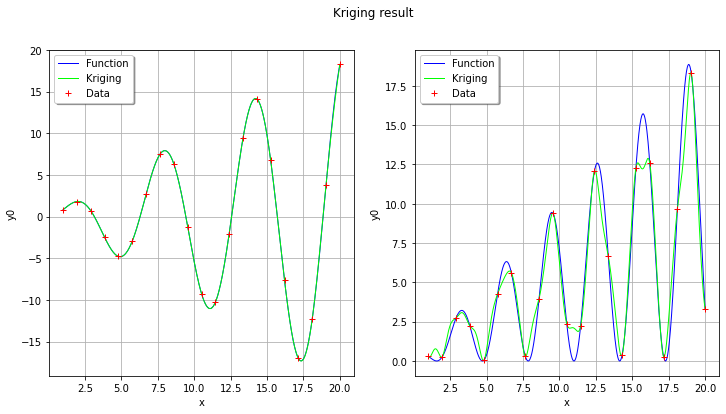

In [9]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))

graph = ref_func1.draw(xmin, xmax, n_pts_plot)
graph.setLegends(["Function"])
graphKriging = kriging_meta[0].draw(xmin, xmax, n_pts_plot)
graphKriging.setColors(["green"])
graphKriging.setLegends(["Kriging"])
graph.add(graphKriging)
cloud = ot.Cloud(x,y1)
cloud.setColor("red")
cloud.setLegend("Data")
graph.add(cloud)
graph.setLegendPosition("topleft")
View(graph, axes=[ax1])

graph = ref_func2.draw(xmin, xmax, n_pts_plot)
graph.setLegends(["Function"])
graphKriging = kriging_meta[1].draw(xmin, xmax, n_pts_plot)
graphKriging.setColors(["green"])
graphKriging.setLegends(["Kriging"])
graph.add(graphKriging)
cloud = ot.Cloud(x,y2)
cloud.setColor("red")
cloud.setLegend("Data")
graph.add(cloud)
graph.setLegendPosition("topleft")
View(graph, axes=[ax2])
fig.suptitle("Kriging result")

### Optimisation des paramètres de krigeage avec l'option "global"
Réaliser l'optimisation en utilisant un algorithme global d'optimisation, GN_DIRECT de la librairie NLopt dans ce cas. 

In [10]:
# Construction d'un modèle initiale de l'algorithme de krigeage.
algo_kriging = pyto.build_default_kriging_algo(input_sample, output_sample, basis=None,
                            covariance_model=None, noise=None)

# Optimisation des paramètres de krigeage en paratant de l'algorithme initial.
kriging_algo = pyto.estimate_kriging_theta(algo_kriging, lower_bound=None, upper_bound=None, 
                                           size=size_multistart, optim_type='global')

# Récupérer les métamodèles et calculer les coefficients Q2
kriging_result = []
for krig_algo in kriging_algo: 
    kriging_result.append(krig_algo.getResult())

kriging_meta = []
Q2 = []
for krig_result in kriging_result:
    kriging_meta.append(krig_result.getMetaModel())
    
    # calcul de Q2 pour les deux métamodèles
    Q2.append(pyto.compute_Q2(input_sample, output_sample, krig_result))
print('Q2:', Q2)

Q2: [0.8615486449036378, 0.22958339679202933]


Text(0.5, 0.98, 'Kriging result')

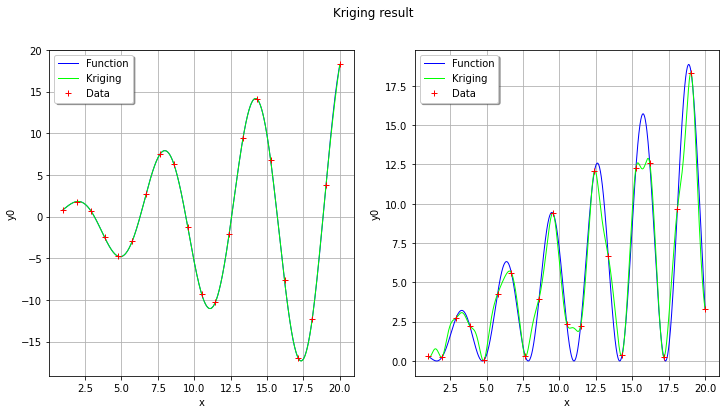

In [11]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))

graph = ref_func1.draw(xmin, xmax, n_pts_plot)
graph.setLegends(["Function"])
graphKriging = kriging_meta[0].draw(xmin, xmax, n_pts_plot)
graphKriging.setColors(["green"])
graphKriging.setLegends(["Kriging"])
graph.add(graphKriging)
cloud = ot.Cloud(x,y1)
cloud.setColor("red")
cloud.setLegend("Data")
graph.add(cloud)
graph.setLegendPosition("topleft")
View(graph, axes=[ax1])

graph = ref_func2.draw(xmin, xmax, n_pts_plot)
graph.setLegends(["Function"])
graphKriging = kriging_meta[1].draw(xmin, xmax, n_pts_plot)
graphKriging.setColors(["green"])
graphKriging.setLegends(["Kriging"])
graph.add(graphKriging)
cloud = ot.Cloud(x,y2)
cloud.setColor("red")
cloud.setLegend("Data")
graph.add(cloud)
graph.setLegendPosition("topleft")
View(graph, axes=[ax2])
fig.suptitle("Kriging result")